# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [299]:
import pandas as pd
import requests
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sb

% matplotlib inline
# matplotlib plot style
plt.style.use('bmh')
sb.set_style("darkgrid", {"axes.facecolor":"0.8"})

In [300]:
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [301]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)
image_df = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [302]:
#CONSUMER_KEY = "CONSUMER_KEY"
#CONSUMER_SECRET = "CONSUMER_SECRET"
#ACCESS_TOKEN = "ACCESS_TOKEN"
#ACCESS_TOKEN_SECRET = "ACCESS_TOKEN_SECRET"



#auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
#auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

#api = tweepy.API(auth, 
 #                parser = tweepy.parsers.JSONParser(), 
 #                wait_on_rate_limit = True,
 #                wait_on_rate_limit_notify = True)

In [303]:
df_j = pd.read_json('tweet-json.txt', lines=True)

In [304]:
df_j = df_j.rename(columns = {'id':'tweet_id'}) # change the id column name to tweet_id

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [305]:
tweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [306]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [307]:
df_j

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [308]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [309]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [310]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

### Quality issues
1. Missing values in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) columns.


2. Name column has invalid values such as (None, the, Bo, a)

3. tweet_id is an integer which is a data type issue, we need to convert it to string.

4. Row # 516 have rating_denominator = 7, which is inaccurate value

5. In image prediction data set the tweet_id is an integer which is a data type issue, we need to convert it to string.

6. In image prediction data frame some entries in p1,p2 and p3 columns have lower case and underscore.



7. In json-text(extra tweet info) data set the tweet_id is an integer which is a data type issue, we need to convert it to string.



8. Handling the mising values in json-text(extra tweet info) data set by droping the columns that contian null or missing values.

9. The column source In twitter-archive data frame contians Multiple formats.

### Tidiness issues
1. Meging dog stage columns into a single column.

2. twitter-archive data frame and json-text(extra tweet info) data frame it should be in one table.

3. There is one variable in two columns which is rating_numerator and rating_denominator, we can reduce it into one column 'rating'


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [311]:
# Make copies of original pieces of data
tweet_clean = tweet_df.copy()
image_clean = image_df.copy()
j_clean = df_j.copy()

In [312]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality


### Issue #1:

#### Define
There are missing values in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) columns.

#### Code

In [313]:
tweet_clean = tweet_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                               'retweeted_status_id', 'retweeted_status_user_id', 
                               'retweeted_status_timestamp'],axis =1)

#### Test

In [314]:
tweet_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## Issue 2
#### Define
Name column has invalid values such as (None, the, Bo, a)

#### Code

In [315]:
tweet_clean = tweet_clean[tweet_clean['name'] != 'None']
tweet_clean = tweet_clean[tweet_clean['name'] != 'the']
tweet_clean = tweet_clean[tweet_clean['name'] != 'Bo']
tweet_clean = tweet_clean[tweet_clean['name'] != 'a']
tweet_clean = tweet_clean[tweet_clean['name'] != 'an']

#### Test

In [316]:
tweet_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


### Issue #3:

#### Define:
tweet_id is an integer which is a data type issue, we need to convert it to string.


#### Code

In [317]:
tweet_clean.info() # tweet_id sould be string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2326
Data columns (total 12 columns):
tweet_id              1532 non-null int64
timestamp             1532 non-null object
source                1532 non-null object
text                  1532 non-null object
expanded_urls         1532 non-null object
rating_numerator      1532 non-null int64
rating_denominator    1532 non-null int64
name                  1532 non-null object
doggo                 1532 non-null object
floofer               1532 non-null object
pupper                1532 non-null object
puppo                 1532 non-null object
dtypes: int64(3), object(9)
memory usage: 155.6+ KB


In [318]:
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype('str')

#### Test

In [319]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2326
Data columns (total 12 columns):
tweet_id              1532 non-null object
timestamp             1532 non-null object
source                1532 non-null object
text                  1532 non-null object
expanded_urls         1532 non-null object
rating_numerator      1532 non-null int64
rating_denominator    1532 non-null int64
name                  1532 non-null object
doggo                 1532 non-null object
floofer               1532 non-null object
pupper                1532 non-null object
puppo                 1532 non-null object
dtypes: int64(2), object(10)
memory usage: 155.6+ KB


### Issue #4:
#### Define:
Row # 516 have rating_denominator = 7, which is inaccurate value

#### Code

In [320]:
tweet_clean[tweet_clean.rating_denominator==7]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [321]:
tweet_clean.rating_denominator = tweet_clean.rating_denominator.replace(7,10) # replace the value of rating_denominator by 7 instaed of 10 with 


#### Test

In [322]:
tweet_clean[tweet_clean.rating_denominator==7] # should be empty

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5
#### Define:
In image prediction data set the tweet_id is an integer which is a data type issue, we need to convert it to string.

#### Code

In [323]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [324]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')

#### Test

In [325]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #6
#### Define:
In image prediction data frame some entries in p1,p2 and p3 columns have lower case and underscore, so we will convert all the values into a lowercase and remove the underscores. 

#### Code

In [326]:
image_clean['p1'] = image_clean.p1.str.replace('_',' ')
image_clean['p2'] = image_clean.p2.str.replace('_',' ')
image_clean['p3'] = image_clean.p3.str.replace('_',' ')
image_clean['p1'] = image_clean.p1.str.replace('-',' ')
image_clean['p2'] = image_clean.p2.str.replace('-',' ')
image_clean['p3'] = image_clean.p3.str.replace('-',' ')
image_clean.p1 = image_clean.p1.str.lower()
image_clean.p2 = image_clean.p2.str.lower()
image_clean.p3 = image_clean.p3.str.lower()

In [327]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese mountain dog,0.651137,True,english springer,0.263788,True,greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft coated wheaten terrier,0.082086,True


### Issue #7
#### Define:
In json-text(extra tweet info) data set the tweet_id is an integer which is a data type issue, we need to convert it to string.

#### Code

In [328]:
j_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [329]:
j_clean['tweet_id'] = j_clean['tweet_id'].astype('str')

#### Test

In [330]:
j_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

### Issue #8
#### Define:
Handling the mising values in j_clean data frame by droping the columns that contian null or missing values.

#### Code

In [331]:
j_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

In [332]:
j_clean = j_clean.drop(['contributors', 'coordinates', 'geo', 'in_reply_to_screen_name', 'in_reply_to_status_id', 
                       'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'place', 
                       'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted_status'], axis=1)

#### Test

In [333]:
j_clean

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,tweet_id,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,user
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336192,False,en,0.0,0.0,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343424,False,en,0.0,0.0,6514,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,False,en,0.0,0.0,4328,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,False,en,0.0,0.0,8964,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,False,en,0.0,0.0,9774,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,891087950875897856,891087950875897856,False,en,0.0,0.0,3261,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,890971913173991424,False,en,0.0,0.0,2158,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,890729181411237888,890729181411237888,False,en,0.0,0.0,16716,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,890609185150312448,890609185150312448,False,en,0.0,0.0,4429,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,890240255349198849,890240255349198848,False,en,0.0,0.0,7711,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Issue #9
#### Define:
Extract the user device from the source column using regular expressions and pandas' str.extract method.

#### Code

In [334]:
# Create a regular expression to extract the string between the tags: <> <>
tweet_clean['source'] = tweet_clean.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];

#### Test

In [335]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2326
Data columns (total 12 columns):
tweet_id              1532 non-null object
timestamp             1532 non-null object
source                1532 non-null object
text                  1532 non-null object
expanded_urls         1532 non-null object
rating_numerator      1532 non-null int64
rating_denominator    1532 non-null int64
name                  1532 non-null object
doggo                 1532 non-null object
floofer               1532 non-null object
pupper                1532 non-null object
puppo                 1532 non-null object
dtypes: int64(2), object(10)
memory usage: 155.6+ KB


## Tidiness

### Issue #1

#### Define:
merging the four stage columns into one column

#### Code

In [336]:
# merging the four stage columns into one column
tweet_clean = pd.melt(tweet_clean, id_vars =['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 
                                            'rating_denominator', 'name'], var_name= 'stage' )
tweet_clean = tweet_clean.drop('value', axis=1)

#### Test

In [339]:
tweet_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo
5,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,doggo
6,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,doggo
7,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
8,890006608113172480,2017-07-26 00:31:25 +0000,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,doggo
9,889880896479866881,2017-07-25 16:11:53 +0000,Twitter for iPhone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,doggo


### Issue #2

#### Define:
Merging the tweet_clean and j_clean into one table.

#### Code

In [214]:
j_clean = j_clean.drop('retweeted', axis=1) # we dont need the retweets
tweet_clean = pd.merge(tweet_clean, j_clean, how = 'inner', on= 'tweet_id')
# drop the duplicated columns 
tweet_clean = tweet_clean.drop('source_y', axis=1)
tweet_clean = tweet_clean.rename(columns= {'source_x':'source'})

In [215]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7655 entries, 0 to 7654
Data columns (total 24 columns):
tweet_id                         7655 non-null object
timestamp                        7655 non-null object
source                           7655 non-null object
text                             7655 non-null object
expanded_urls                    7655 non-null object
rating_numerator                 7655 non-null int64
rating_denominator               7655 non-null int64
name                             7655 non-null object
stage                            7655 non-null object
created_at                       7655 non-null datetime64[ns]
display_text_range               7655 non-null object
entities                         7655 non-null object
extended_entities                7095 non-null object
favorite_count                   7655 non-null int64
favorited                        7655 non-null bool
full_text                        7655 non-null object
id_str                    

#### Test

In [43]:
tweet_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,favorited,full_text,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,truncated,user
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336192,False,en,0.0,0.0,8853,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,False,This is Tilly. She's just checking pup on you....,892177421306343424,False,en,0.0,0.0,6514,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,0.0,0.0,4328,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,False,en,0.0,0.0,8964,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,False,This is Franklin. He would like you to stop ca...,891327558926688256,False,en,0.0,0.0,9774,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Issue #3:

#### Define 
There is one variable in two columns which is rating_numerator and rating_denominator, we can reduce it into one column 'rating'.

#### Code

In [51]:
rating = tweet_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True) # pick the decimals in the ratings using a regex
rating.columns = ['rating_numerator', 'rating_denominator']

tweet_clean['rating'] = tweet_clean.rating_numerator/tweet_clean.rating_denominator
tweet_clean = tweet_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [52]:
tweet_clean

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,full_text,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,truncated,user,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,...,This is Phineas. He's a mystical boy. Only eve...,892420643555336192,False,en,0.0,0.0,8853,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,...,This is Tilly. She's just checking pup on you....,892177421306343424,False,en,0.0,0.0,6514,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,...,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,0.0,0.0,4328,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,...,This is Darla. She commenced a snooze mid meal...,891689557279858688,False,en,0.0,0.0,8964,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,...,This is Franklin. He would like you to stop ca...,891327558926688256,False,en,0.0,0.0,9774,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.2
5,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,None,None,...,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991424,False,en,0.0,0.0,2158,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3
6,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,...,This is Zoey. She doesn't want to be one of th...,890609185150312448,False,en,0.0,0.0,4429,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3
7,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,...,This is Cassie. She is a college pup. Studying...,890240255349198848,False,en,0.0,0.0,7711,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.4
8,890006608113172480,2017-07-26 00:31:25 +0000,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,None,None,None,None,...,This is Koda. He is a South Australian decksha...,890006608113172480,False,en,0.0,0.0,7624,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3
9,889880896479866881,2017-07-25 16:11:53 +0000,Twitter for iPhone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,Bruno,None,None,None,None,...,This is Bruno. He is a service shark. Only get...,889880896479866880,False,en,0.0,0.0,5156,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [115]:
tweet_clean = pd.merge(tweet_clean, image_clean, how = 'inner', on= 'tweet_id')
tweet_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
- There's a positive relationship between the number of retweets and favourites, once the number of retweets increases, the favourites also increasing.

- Most of the users who tweeted are an iphone users.

- P1 algorithm has the highest confidence rate than other algorithms.

- We note the doggo|puppo stage has the highest average rating where the pupper stage has the lowest rating.

- We note that the distribution of both retweets and favorit is significantly right-skewed, however, the mean of favorite count (8863.2) is greater than retweet count (2722.6). We also note that the maximum number of favorite a tweet received was 143573, where the maximum number of retweets a tweet received was 77,488.

- The pupper stage has the highest count where the (doggo|floofer) and (doggo|puppo) has the lowest count.

- The average retweet_count for (doggo|puppo) is the highest (greater than 17,500 retweets), where the average retweet_count for the pupper is the lowest (less than 2,500).

- Similarly, the average favorite_count for (doggo|puppo) stage has the highest average favorit_count, where the pupper has the lowest average favorite count.

### Visualization

#### The dogs type with highest rating

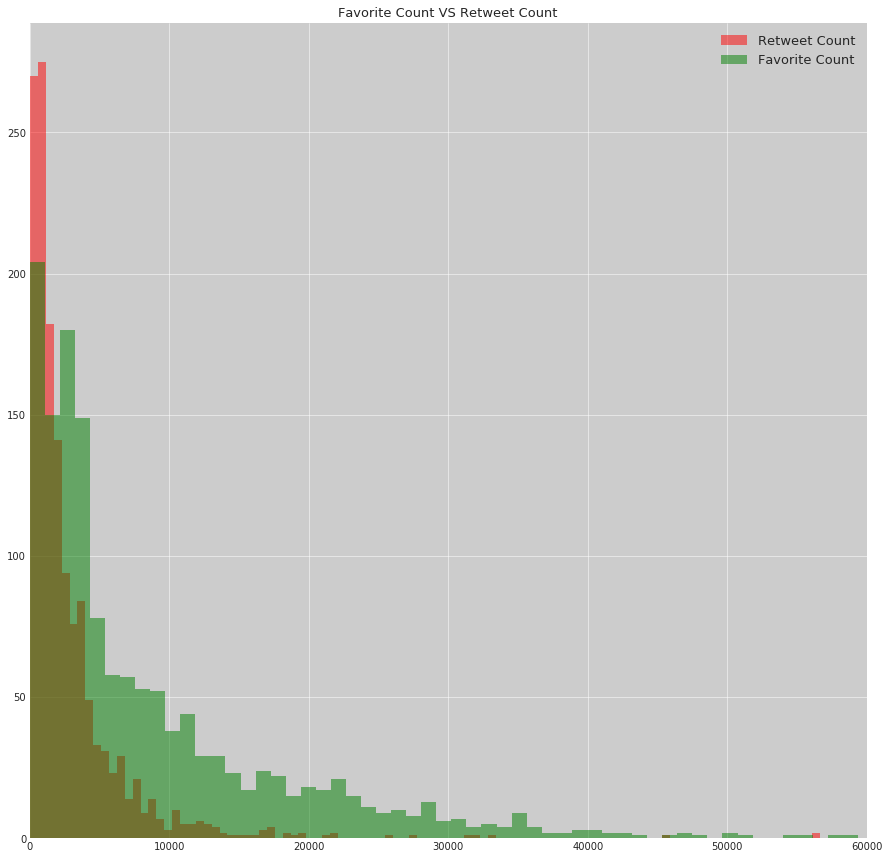

In [116]:
plt.figure(figsize=(15,15))
tweet_clean.retweet_count.hist(alpha=0.5, bins=100, label = 'Retweet Count', color='red')
tweet_clean.favorite_count.hist(alpha=0.5, bins=100, label = 'Favorite Count', color='green')
plt.title("Favorite Count VS Retweet Count", fontsize=13)
plt.legend(loc = 'upper right', fontsize=13)
plt.xlim(0,60000)
plt.show()

The histogram above shows that the number of favourites is higher than retweets.

Text(0.5,1,'retweet_count VS favorite_count   (correlation)')

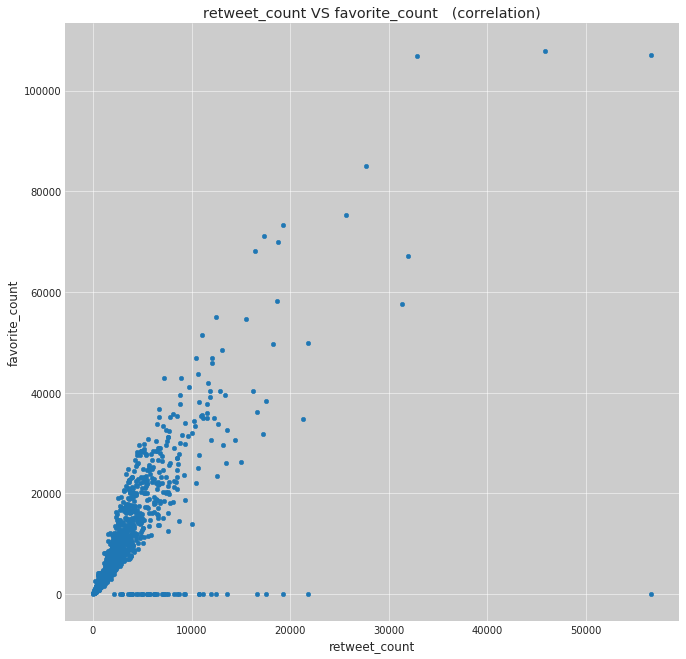

In [117]:
tweet_clean.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(11,11), color='tab:blue')
plt.title('retweet_count VS favorite_count   (correlation)')

The above plot shows that there's a positive relationship between the retweets and favourites. as the number of retweets increases the favourites also increasing.

Text(0.5,1,'Tweet Sources ')

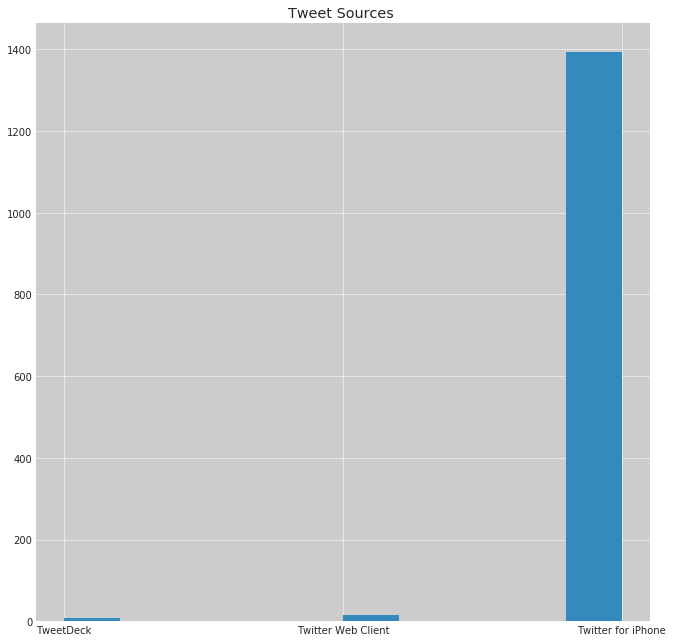

In [118]:
tweet_clean.source.hist(label = 'source', figsize=(11,11))
plt.title('Tweet Sources ')

The plot above shows that the most users tweeted from an iphone.

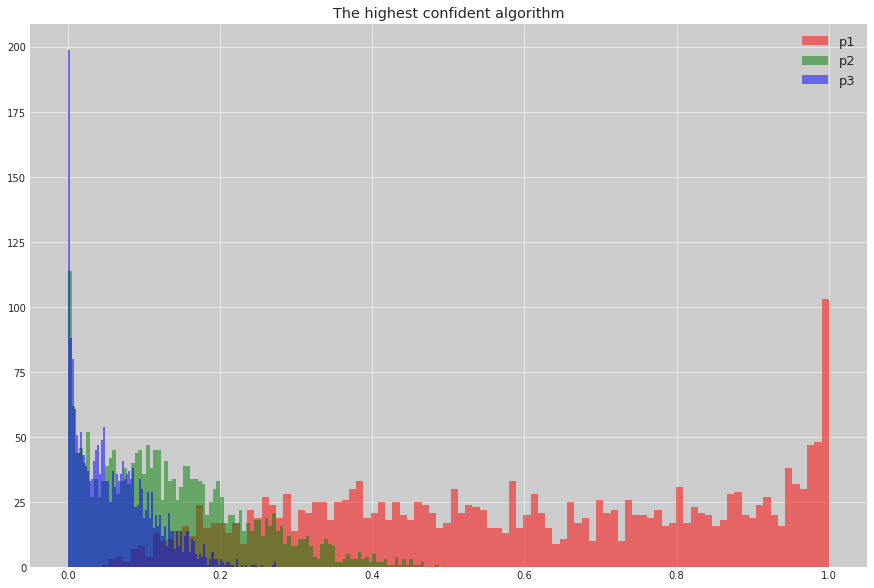

In [119]:
plt.figure(figsize=(15,10))
image_clean.p1_conf.hist(alpha=0.5, bins=100, label = 'p1', color='red')
image_clean.p2_conf.hist(alpha=0.5, bins=100, label = 'p2', color='green')
image_clean.p3_conf.hist(alpha=0.5, bins=100, label = 'p3', color='blue')
plt.title('The highest confident algorithm')
plt.legend(loc = 'upper right', fontsize=13)
plt.show()

Looking at the figure above we see, that p1 algorithm has the highest confident and p3 algorithm has the lowest.